In [1]:
year=2019
month=10

# Developer Salary in First-Tier Cities 程序员工资调查
我在4月1日到3日之间，抓取了某招聘网站的软件和互联网类招聘数据40万条，其中通过程序判断为程序员的14万条。地域方面，我选择了24个主要城市。不过本文只以一线城市为研究对象。这样是为了和我2017年6月的数据做对比。

提到2017年的文章，现在居然还有很多人，把这篇文章拿出来炒作。对于社会来说，可气的是，他们直接把2017改成2019，就发表了，这不是骗人么？！对于我来说，可气的是，他们转载居然还冒充是原创，是可忍熟不可忍！

In [2]:
import pandas as pd
import sys
sys.path.append('..')
sys.path.append('../py')
sys.path.append('../../py')
import db
import inspect
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
import seaborn as sns
import scipy.stats as stats
import numpy as np
import weighted
%matplotlib inline

In [3]:
conn=db.get_conn()
data_original=pd.read_sql(sql=f"select * from _{year}{month:02} where monthly_salary>0 and monthly_salary<80000 and city in ('北京','上海','广州','深圳')  and monthly_salary<80000 and YEAR(publish_date)={year} and MONTH(publish_date)={month}  ", con=conn)
conn.close()

In [4]:
error_job_ids=['104660258','104142922','108434795','101357291','106253516','110368302','111391233','108665401','109277048'
                  ,'73857191','108584955','102824950','102824949','111391233','110884556']
data=data_original[~data_original.job_id.isin(error_job_ids)]

In [5]:
#del data['publish_date']
#del data['published_on_weekend']
#del data['title']
#del data['title']
#del data['company_title']
#del data['company_description']
#del data['job_description']
#del data['job_id']

In [6]:
data=data.sort_values(by='headcount', ascending=False)
data.head()

,job_id,monthly_salary,headcount,title,zhinengleibie,career,real_province,province,city,company_description,...,pl_visual_basic,publish_date,published_on_weekend,tag_baby_care,tag_five_insurance,tag_flexible,tag_no_overtime,tag_rest_one_day,tag_rest_two_days,tag_stock
2509,116717167,10000,200,海外业务软件工程师（2020届）,软件工程师,一般程序员,None,上海,上海,上海海隆软件有限公司成立于1989年4月，是国内著名软件企业、国家规划布局内重点软件企业。公...,...,False,2019-10-02,False,False,True,True,False,False,False,False
3554,117502838,10000,50,2020届应届毕业生,深度学习工程师,算法工程师,None,广东,深圳,集团简介：豪恩创建于1995年，是一家按照现代化企业管理运作的科技集团型公司。产业涉及汽车电...,...,False,2019-10-02,False,False,True,False,False,False,False,False
546,109088859,5250,50,安卓程序员,互联网软件开发工程师,一般程序员,None,广东,广州,象蓝（广州）股份有限公司（以下简称象蓝）成立于2017年9月，是一家专注项目融资，项目研发，...,...,False,2019-10-02,False,False,False,False,False,False,False,False
545,109088047,5250,50,开发资深程序,系统架构设计师,系统架构师,None,广东,广州,象蓝（广州）股份有限公司（以下简称象蓝）成立于2017年9月，是一家专注项目融资，项目研发，...,...,False,2019-10-02,False,False,False,False,False,False,False,False
547,109088921,5250,50,ios程序员,互联网软件开发工程师,一般程序员,None,广东,广州,象蓝（广州）股份有限公司（以下简称象蓝）成立于2017年9月，是一家专注项目融资，项目研发，...,...,False,2019-10-02,False,False,False,False,False,False,False,False


In [7]:
def pd_weighted_mean(group, avg_name, weight_name):
    """ http://stackoverflow.com/questions/10951341/pandas-dataframe-aggregate-function-using-multiple-columns
    In rare instance, we may not have weights, so just return the mean. Customize this if your business case
    should return otherwise.
    """
    d = group[avg_name]
    w = group[weight_name]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return d.mean()


# Unilateral Stats 总体统计

有数据可知，程序员向一线城市集中的趋势非常明显。

According to the statistics, significant amount of developers are in the first tier cities.

In [8]:
data.shape

(4223, 94)

In [9]:
data.headcount.sum()

15183

In [10]:
salary_mean=weighted.weighted_mean(data.monthly_salary.values, data.headcount.values)
q=weighted.weighted_quantile(data.monthly_salary.values,[0.025,0.25,0.5,0.75,0.975], data.headcount.values)
q

array([ 5000., 10500., 15000., 22500., 40000.])

In [11]:
print(f'{year}年{month}月中国一线城市程序员的平均工资为{salary_mean:.0f}元，工资中位数为{q[2]:.0f}元，其中95%的人的工资位于{q[0]:.0f}到{q[4]:.0f}元之间。')

2019年10月中国一线城市程序员的平均工资为17465元，工资中位数为15000元，其中95%的人的工资位于5000到40000元之间。


In [12]:
print(f'In {year}, Developers in China earn {salary_mean:.0f} Yuan as average, '
      f'the median is {q[2]:.0f} Yuan, 95% of them earn between {q[0]:.0f} and {q[4]:.0f} Yuan.')

In 2019, Developers in China earn 17465 Yuan as average, the median is 15000 Yuan, 95% of them earn between 5000 and 40000 Yuan.


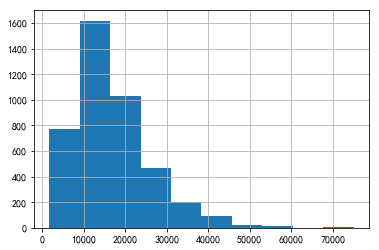

In [13]:
data.monthly_salary.hist()

It does not look like normal distribution.

In [14]:
from scipy import stats

In [15]:
stats.normaltest(data.monthly_salary)

NormaltestResult(statistic=1085.1180909652855, pvalue=2.3420730686742865e-236)

null hypothesis: x comes from a normal distribution
    
p=0

The null hypothesis can be rejected

conclusion: data is not normally distributed.

Zoom in

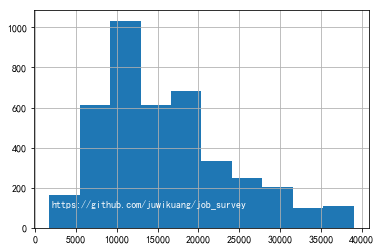

In [16]:
data[data.monthly_salary<40000].monthly_salary.hist()
plt.annotate('https://github.com/juwikuang/job_survey', xy=(0,0), xytext=(2000, 100), color='white')
plt.show()

## Role 角色

In [17]:
#Common Functions
def get_sub_stats_by_col(data, col):
    categories=data[col].unique()
    salary_mean=[]
    salary_95_min=[]
    salary_95_max=[]
    salary_median=[]
    

    count=[]
    
    categorys_out=[]
    for category in categories:
        #print(feature)
        idata=data[data[col]==category]
        headcount=idata.headcount.sum()
        values = idata.monthly_salary.values
        weights = idata.headcount.values
        #print(str(headcount))
        if headcount==0:
            continue
        
        salary_mean.append(np.average(values, weights=weights))
        

        q = weighted.weighted_quantile(values,[0.025,0.5,0.975],weights)
        salary_95_min.append(q[0])
        salary_median.append(q[1])
        salary_95_max.append(q[2])
        count.append(idata.headcount.sum())
        categorys_out.append(category)
    sub_data=pd.DataFrame()
    sub_data[col]=[c for c in categorys_out]
    sub_data['salary_mean']=salary_mean
    sub_data['salary_95_min']=salary_95_min
    sub_data['salary_median']=salary_median
    sub_data['salary_95_max']=salary_95_max
    sub_data['head_count']=count
    sub_data['percentage']=count/np.sum(count)
    sub_data=sub_data.sort_values(by='salary_mean', ascending=False)

    return sub_data

def get_sub_stats_by_prefix(data, prefix):
    
    features = [feature for feature in data.columns if feature.startswith(prefix)]
    salary_mean=[]
    salary_median=[]
    salary_95_min=[]
    salary_95_max=[]
    count=[]
    
    features_out=[]
    for feature in features:
        #print(feature)
        idata=data[data[feature]==1]
        headcount=idata.headcount.sum()
        values = idata.monthly_salary.values
        weights = idata.headcount.values
        #print(str(headcount))
        if headcount==0:
            continue
        
        salary_mean.append(weighted.weighted_mean(values, weights))
        q = weighted.weighted_quantile(values,[0.025,0.5,0.975],weights)
        salary_median.append(q[1])
        salary_95_min.append(q[0])
        salary_95_max.append(q[2])
        count.append(idata.headcount.sum())
        features_out.append(feature)
    sub_data=pd.DataFrame()
    sub_data['rank']=range(0,len(features_out))
    sub_data[prefix]=[f.replace(prefix,'') for f in features_out]
    sub_data['salary_mean']=salary_mean
    sub_data['salary_median']=salary_median
    sub_data['salary_95_min']=salary_95_min
    sub_data['salary_95_max']=salary_95_max
    sub_data['head_count']=count
    sub_data['percentage']=count/np.sum(count)
    sub_data=sub_data.sort_values(by='salary_mean', ascending=False)
    sub_data['rank']=range(1,len(features_out)+1)
    #sub_data=sub_data.reset_index()
    return sub_data

def apply_style(sub_data):
    return sub_data.style.hide_index().format(
    {"salary_mean":"{:.0f}","salary_median":"{:.0f}","salary_95_min":"{:.0f}","salary_95_max":"{:.0f}","percentage":"{:.2%}"})

In [18]:
data_career = get_sub_stats_by_col(data,'career')
data_career.style.format({"salary_mean":"{:.0f}","salary_median":"{:.0f}","percentage":"{:.2%}"})

,career,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
2,系统架构师,25632,4880.45,25000,52500,698,4.60%
1,算法工程师,21369,5984.09,20000,45916.3,1553,10.23%
0,一般程序员,16564,4500,14000,37500,12911,85.04%
3,爬虫工程师,11444,6500,12000,14000,18,0.12%
4,生物信息工程师,8000,8000,8000,8000,3,0.02%


In [19]:
np.sum(data.monthly_salary * data.headcount) / data.headcount.sum()

17464.793519067378

In [20]:
data.headcount.sum()

15183

In [21]:
data.headcount.describe()

count    4223.000000
mean        3.595311
std         4.659444
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       200.000000
Name: headcount, dtype: float64

In [22]:
pd.options.display.max_columns=100
data.sort_values(by='headcount', ascending=False).head()

,job_id,monthly_salary,headcount,title,zhinengleibie,career,real_province,province,city,company_description,company_size,company_title,company_type,page_title,ageism,db_Apache_Hive,db_CouchBase,db_CouchDB,db_DB2,db_DynamoDB,db_Elasticsearch,db_FileMaker,db_Firebase,db_Firebird,db_Hbase,db_Informix,db_Ingres,db_MariaDB,db_Memcached,db_MongoDB,db_MySQL,db_Neo4j,db_Netezza,db_Oracle,db_PostgreSQL,db_Redis,db_Riak,db_SAP_HANA,db_SQL_Server,db_SQLite,db_Solr,db_Splunk,db_Sybase,db_Teradata,db_dBase,edu,english,experience,expert_adas,expert_blockchain,expert_embed,expert_expert,expert_gis,_996_yes,_996_no,industry,japanese,job_description,job_summary,job_tags,phone_android,phone_app,phone_iso,pl_c_sharp,pl_cpp,pl_delphi,pl_go,pl_haskell,pl_java,pl_javascript,pl_julia,pl_kotlin,pl_lua,pl_matlab,pl_objective_c,pl_perl,pl_php,pl_python,pl_ruby,pl_rust,pl_scrala,pl_swift,pl_typescript,pl_vba,pl_visual_basic,publish_date,published_on_weekend,tag_baby_care,tag_five_insurance,tag_flexible,tag_no_overtime,tag_rest_one_day,tag_rest_two_days,tag_stock
2509,116717167,10000,200,海外业务软件工程师（2020届）,软件工程师,一般程序员,None,上海,上海,上海海隆软件有限公司成立于1989年4月，是国内著名软件企业、国家规划布局内重点软件企业。公...,1000-5000,上海海隆软件有限公司,民营公司,【上海-徐汇区海外业务软件工程师（2020届）_海外业务软件工程师（2020届）招聘_上海海...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,本科,False,no,False,False,False,False,False,False,False,computer,True,针对有志从事软件开发的应届毕业生，在毕业后可选择进入公司培训中心，接受脱产带薪培训，培训内容...,上海-徐汇区|无工作经验|本科|招200人|10-02发布,"五险一金,专业培训,员工旅游,年终奖金,弹性工作,定期体检,出国机会,绩效奖金,工作午餐,加薪晋升",False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,2019-10-02,False,False,True,True,False,False,False,False
546,109088859,5250,50,安卓程序员,互联网软件开发工程师,一般程序员,None,广东,广州,象蓝（广州）股份有限公司（以下简称象蓝）成立于2017年9月，是一家专注项目融资，项目研发，...,50-150,象蓝（广州）股份有限公司,民营公司,【广州-白云区安卓程序员_安卓程序员招聘_象蓝（广州）股份有限公司】-前程无忧官方招聘网站,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,大专,False,1_3,False,False,False,False,False,False,False,computer,False,负责APP开发程序员，进行详细设计、代码开发，配合测试，高质量完成项目。象蓝（广州）股份有限...,广州-白云区|2年经验|大专|招50人|10-02发布|普通话熟练,"绩效奖金,全勤奖",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2019-10-02,False,False,False,False,False,False,False,False
545,109088047,5250,50,开发资深程序,系统架构设计师,系统架构师,None,广东,广州,象蓝（广州）股份有限公司（以下简称象蓝）成立于2017年9月，是一家专注项目融资，项目研发，...,50-150,象蓝（广州）股份有限公司,民营公司,【广州-白云区开发资深程序_开发资深程序招聘_象蓝（广州）股份有限公司】-前程无忧官方招聘网站,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,大专,False,1_3,False,False,False,False,False,False,False,computer,False,负责APP移动架构师/移动开发资深程序，负责产品采用什么技术，制定前后台交互规则，是否采用框...,广州-白云区|2年经验|大专|招50人|10-02发布|普通话熟练,"绩效奖金,全勤奖",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2019-10-02,False,False,False,False,False,False,False,False
547,109088921,5250,50,ios程序员,互联网软件开发工程师,一般程序员,None,广东,广州,象蓝（广州）股份有限公司（以下简称象蓝）成立于2017年9月，是一家专注项目融资，项目研发，...,50-150,象蓝（广州）股份有限公司,民营公司,【广州-白云区ios程序员_ios程序员招聘_象蓝（广州）股份有限公司】-前程无忧官方招聘网站,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,大专,False,1_3,False,False,False,False,False,False,False,computer,False,负责APP开发，进行详细设计、代码开发，配合测试，高质量完成项目。象蓝（广州）股份有限公司，...,广州-白云区|2年经验|大专|招50人|10-02发布|普通话熟练,"绩效奖金,全勤奖",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2019-10-02,Fal

In [23]:
data.headcount.sum()

15183

# 城市

In [24]:
headcount_by_cities = data.groupby(by='city').headcount.sum()

In [25]:
headcount_by_cities


city
上海    5565
北京    3007
广州    3403
深圳    3208
Name: headcount, dtype: int64

([<matplotlib.patches.Wedge at 0x1a3640ae128>,
 [Text(0.44784689098521263, 1.0047055102042983, '上海'),
  Text(-1.074336587679079, 0.23622213353975277, '北京'),
  Text(-0.48923317353005363, -0.9852161701462845, '广州'),
  Text(0.8664334048940944, -0.677711704844786, '深圳')],
 [Text(0.2442801223555705, 0.5480211873841626, '36.7%'),
  Text(-0.5860017750976794, 0.12884843647622876, '19.8%'),
  Text(-0.26685445828912013, -0.5373906382616096, '22.4%'),
  Text(0.47260003903314235, -0.3696609299153378, '21.1%')])

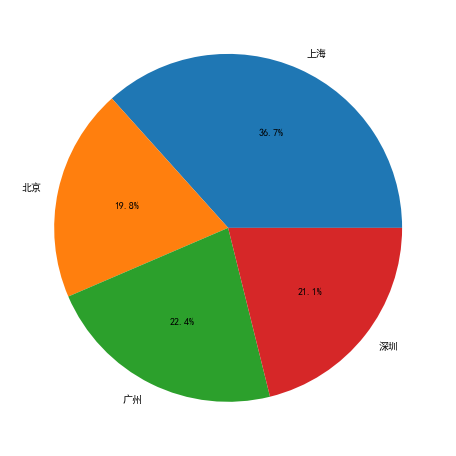

In [26]:
plt.figure(figsize=(10,8))
plt.pie(headcount_by_cities.values, labels=headcount_by_cities.index, autopct='%1.1f%%')

In [27]:
data_pl=get_sub_stats_by_col(data,'city')
apply_style(data_pl)

city,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,21005,4500,17500,45000,3007,19.81%
深圳,18274,5250,15000,40984,3208,21.13%
上海,16954,5250,15000,37500,5565,36.65%
广州,14410,3839,12500,35000,3403,22.41%


In [28]:
salary_beijing=data[data.city=='北京'].monthly_salary
salary_shanghai=data[data.city=='上海'].monthly_salary
salary_guangzhou=data[data.city=='广州'].monthly_salary
salary_shenzhen=data[data.city=='深圳'].monthly_salary

In [29]:
stats.f_oneway(salary_beijing, salary_shanghai)

F_onewayResult(statistic=93.84548271741176, pvalue=8.80238856456703e-22)

In [30]:
stats.f_oneway(salary_shanghai, salary_shenzhen)

F_onewayResult(statistic=0.10325266838669381, pvalue=0.74798799837756)

In [31]:
stats.f_oneway(salary_shenzhen, salary_guangzhou)

F_onewayResult(statistic=93.00393645395916, pvalue=1.6010392483945981e-21)

# 编程语言

In [32]:
data_pl=get_sub_stats_by_prefix(data,'pl_')
apply_style(data_pl)

rank,pl_,salary_mean,salary_median,salary_95_min,salary_95_max,head_count,percentage
1,rust,27831,31667,9000,45000,62,0.28%
2,go,22932,22500,4500,45000,2444,10.87%
3,lua,22846,25000,10000,40000,343,1.53%
4,swift,21986,21500,8554,37260,284,1.26%
5,python,21197,19000,4500,45000,2642,11.75%
6,kotlin,20377,24318,9011,33169,81,0.36%
7,matlab,19556,17500,8850,41143,288,1.28%
8,cpp,19163,17500,5250,45000,3897,17.33%
9,php,18914,15000,4181,45000,1255,5.58%
10,java,17064,15000,4542,37500,6214,27.64%


数据显示，haskell才是最赚钱的编程语言。python是主流语言里面最赚钱的，比java的工资多了3000元！vb是最不赚钱的了。其中，最赚钱的编程语言和最不赚钱的，工资居然差了2倍。所以，要选好编程语言呀！

# 教育

In [33]:
edu_counts=data[~(data.edu=='')].groupby(by=['edu']).headcount.sum()

In [34]:
edu_counts

edu
初中及以下       2
博士          4
大专       4060
本科       8861
硕士        503
高中         17
Name: headcount, dtype: int64

([<matplotlib.patches.Wedge at 0x1a363f9f908>,
 [Text(1.0999998799197497, 0.0005139810661011047, '初中及以下'),
  Text(1.0999980787165191, 0.0020559231422413826, '博士'),
  Text(0.6386587668644843, 0.8956087200932874, '大专'),
  Text(-0.7436255006443333, -0.8105683899532875, '本科'),
  Text(1.0913544669302566, -0.13764238995082834, '硕士'),
  Text(1.0999913233967604, -0.004369033284831516, '高中')],
 [Text(0.5999999345016817, 0.0002803533087824207, '0.0%'),
  Text(0.5999989520271922, 0.001121412623040754, '0.0%'),
  Text(0.3483593273806278, 0.48851384732361125, '30.2%'),
  Text(-0.4056139094423636, -0.44212821270179314, '65.9%'),
  Text(0.5952842546892307, -0.07507766724590637, '3.7%'),
  Text(0.5999952673073238, -0.0023831090644535536, '0.1%')])

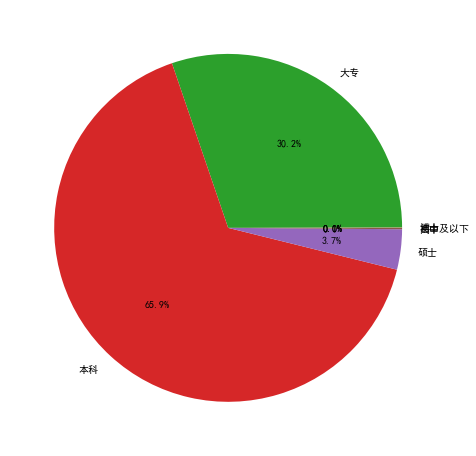

In [35]:
plt.figure(figsize=(10,8))
plt.pie(edu_counts.values, labels=edu_counts.index, autopct='%1.1f%%')

In [36]:
data_edu=get_sub_stats_by_col(data[data.edu.isin(['初中及以下','高中','大专','本科','硕士','博士'])], 'edu')
apply_style(data_edu)

edu,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
博士,30875,18500,27500,50000,4,0.03%
本科,18877,4500,16000,45000,8861,65.90%
硕士,18362,4139,17500,41583,503,3.74%
大专,15183,4500,12500,35000,4060,30.19%
初中及以下,10000,10000,10000,10000,2,0.01%
高中,7000,5250,7000,10500,17,0.13%


In [37]:
salary_associate=data[data.edu=='大专'].monthly_salary
salary_bachelor=data[data.edu=='本科'].monthly_salary
salary_master=data[data.edu=='硕士'].monthly_salary
salary_phd=data[data.edu=='博士'].monthly_salary

In [38]:
print('大专，本科，硕士，博士的平均工资分别是{:.0f}，{:.0f}，{:.0f}，{:.0f}。中位数分别是{:.0f}， {:.0f}，{:.0f}， {:.0f}。'.format(
    salary_associate.mean(),salary_bachelor.mean(),salary_master.mean(),salary_phd.mean(),
    salary_associate.median(),salary_bachelor.median(),salary_master.median(),salary_phd.median()))

大专，本科，硕士，博士的平均工资分别是14156，18589，19344，32000。中位数分别是12500， 16000，19750， 27500。


In [39]:
stats.f_oneway(salary_phd, salary_master)

F_onewayResult(statistic=5.6792544353086285, pvalue=0.018332164428682025)

In [40]:
stats.f_oneway(salary_master, salary_bachelor)

F_onewayResult(statistic=0.8238041359705677, pvalue=0.3641517811587448)

In [41]:
stats.f_oneway(salary_bachelor, salary_associate)

F_onewayResult(statistic=165.78850663683775, pvalue=4.074045181289053e-37)

经过Oneway Anova Test，证明从大专到博士，学历每提高一级，工资都有显著的提高。

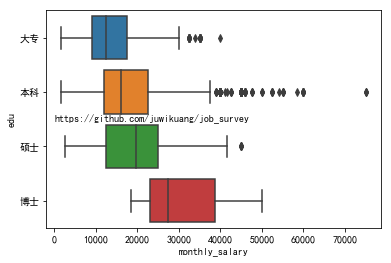

In [42]:

order=['大专','本科','硕士','博士']
a=sns.boxplot(y='edu',x='monthly_salary',order=order,data=data[data.edu.isin(order)], orient='h')
plt.annotate('https://github.com/juwikuang/job_survey', xy=(0.5,1.5), xytext=(2, 1.55))
plt.show()

# 工作经验 Working Experience

In [43]:
data_experience=get_sub_stats_by_col(data, 'experience')
apply_style(data_experience)

experience,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
10+,34728,5538,30833,60000,53,0.35%
5_10,23736,12000,20500,52500,1521,10.02%
3_5,20993,9000,17500,45000,4273,28.14%
no,15247,3750,12500,35000,5407,35.61%
1_3,14019,5250,12500,30000,3929,25.88%


In [44]:
salary_we_10=data[data.experience=='10+'].monthly_salary
salary_we_5_10=data[data.experience=='5_10'].monthly_salary
salary_we_3_5=data[data.experience=='3_5'].monthly_salary
salary_we_1_3=data[data.experience=='1_3'].monthly_salary
salary_we_no=data[data.experience=='no'].monthly_salary

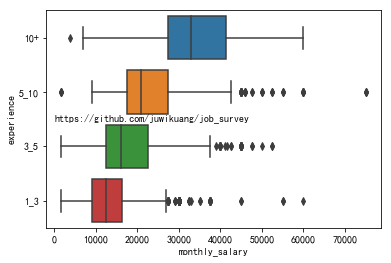

In [45]:

order=['10+','5_10','3_5','1_3']
sns.boxplot(y='experience',x='monthly_salary',order=order,data=data[data.experience.isin(order)], orient='h')
plt.annotate('https://github.com/juwikuang/job_survey', xy=(1.5,1.5), xytext=(1.55, 1.55))
plt.show()

# 公司 Company

## 公司性质 Company Type

In [46]:
data_company_type=get_sub_stats_by_col(data,'company_type')
apply_style(data_company_type)

company_type,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
外资（欧美）,18393,6813,17500,35000,1125,7.41%
民营公司,17789,4500,15000,41118,11561,76.14%
外资（非欧美）,17018,5733,15000,39212,658,4.33%
合资,15960,3714,15000,30225,934,6.15%
非营利组织,15000,6500,11600,27500,16,0.11%
国企,14068,5298,12500,25000,869,5.72%
事业单位,12471,8000,12500,17500,20,0.13%


us_eu是欧美外企，startup是创业公司，listed是上市公司，state是国企，private是私企，foreign是非欧美外企，其他不足1000个样本的不管了。

## 公司规模 Company Size

In [47]:
data_company_size=get_sub_stats_by_col(data,'company_size')
apply_style(data_company_size)

company_size,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
10000+,26345,4500,30000,52500,2468,16.26%
5000-10000,20248,9000,20000,45000,399,2.63%
1000-5000,17603,5250,15000,42833,1412,9.30%
150-500,16887,6250,15000,35000,3028,19.94%
500-1000,16029,5250,15000,34133,962,6.34%
50-150,15390,5250,15000,30000,4281,28.20%
50-,13371,2500,12500,33625,2006,13.21%
,12682,4779,12500,22500,627,4.13%


公司越大，工资越高

## 行业 Industry

In [48]:
data_industry=get_sub_stats_by_col(data,'industry')
apply_style(data_industry)

industry,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
computer,18077,4500,15000,45000,12131,79.90%
finance,17496,5458,15000,38750,360,2.37%
edu,15717,7000,13667,35161,951,6.26%
gov,15252,5806,12500,34437,109,0.72%
trade,14700,6500,12500,31375,674,4.44%
ads,14582,5250,12450,34375,190,1.25%
logistic,14069,5388,12500,21467,144,0.95%
service,14020,7000,12500,27583,136,0.90%
realestate,13886,6250,12500,22500,190,1.25%
medical,12830,2500,12500,23425,183,1.21%
